Project for the course of Microeconometrics _ Summer 2020, M.Sc. Economics, Bonn University _ [Solmaz Ahmadi](https://github.com/solmazahmadi).

---

 __A replication of Bronzini, R., & Lachini, E. (2014).__

In this notebook, we replicate the key result of the following paper:

>  ***Bronzini, R., & Lachini, E. (2014). Are incentives for R&D effective? Evidence from a regression discontinuity approach. American Economic Journal: Economic Policy, 6(4), 100-134.***


__Downloading and viewing this notebook:__

- The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/solmazahmadi/microeconometrics-course-project-solmazahmadi). Other viewing options like *MyBinder*  or *NBViewer* may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files]() on GitHub).

- The original paper, as well as the data and code provided by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/pol.6.4.100).

__Information about replication and individual contributions:__

- For the replication, I try to remain true to the original structure of the paper so readers can easily follow along and compare. All tables and figures are named and labeled as they appear in Bronzini, R., & Iachini, E. (2014).

- The tables in my replication appear transposed compared to the original tables to suit my workflow in Python.

- For transparency, all sections in the replication that constitute independent contributions by me and are not part of results presented (or include deviations from the methods used) in the paper are marked as extensions.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Replication-of-Bronzini,-R.,-&amp;-Iachini,-E.-(2014)." data-toc-modified-id="Replication-of-Bronzini,-R.,-&amp;-Iachini,-E.-(2014).-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><strong>Replication of Bronzini, R., &amp; Iachini, E. (2014).</strong></a></span></li></ul></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Table of Contents</strong></a></span></li></ul></div>

# 1. Introduction

Bronzini and Lachini (2014) study the effects of a unique R&D subsidy program executed in northern Italy on investment expenditures of firms. The public R&D funding is a government policy that aims to trigger marginal projects, those that would not be carried out without the subventions. The economic rationale behind the R&D subsidies is firstly to conquer market failure of knowledge as a public good the positive externalities of which cannot be fully internalized by the firm. secondly, the government grants aid to overcome the firm's liquidity constraints. Firms were asked to present a proposal for their new projects and an independent technical committee scores them. Only firms whose scores were exceeded a specific threshold were awarded public grants. To estimate the causal impact of subsidies, Bronzini and Lachini (2014) apply a sharp regression discontinuity design (RDD) comparing the private investment spending of funded and nonfunded firms with scores close to the threshold. Among nonexperimental econometric methods, the regression discontinuity controls preferably for the endogeneity of treatment since it can be shown as a randomized experiment by arguing that the agents had been randomly drawn just below or just above the cutoff. The paper finds for the whole sample of firms, the investment expenditures do not increase significantly. since the overall impact hides the considerable heterogeneity in the program’s effect, Bronzini and Lachini (2014)  divide the sample by small and large firms and demonstrate that although the subsidy did not affect large enterprises' investment spending, small companies raised their investments—by roughly the amount of the grant they gained.


Main variables for the sample as a whole are presented in the table 1.1:

| main variables   |            main outcome variables            |      main covriates    |  
|----------------- |----------------------------------------------|----------------------- |
| treatment effect | investment (total, tangible, and intangible) |      score             |   
|        -         |              labor costs                     |       ROA              |   
|        -         |             employmentand                    | Net worth assets/Debts |   
|        -         |                 wages                        |   Cash flow/Sales      |   
|        -         |            service costs                     |  Interest costs/Debts  |   


(((
 By letting the outcome variable be a function of the score, the average treatment
effect of the program is assessed through the estimated value of the discontinuity at
the threshold. ))))

The rest of notbook is structured as follows. In the second section, we review the theoretical framework for the paper. Sectin 3 describes the identification strategy utilized by the authors to unravel causal effects of gorment subsidy program on investment expenditure of companies. Section 4 discusses the paper emprical method used for the estimation. In section 5, we replicate the key results of the paper by Bronzini and Lachini (2014) and discuss it in detail. Section 6 conducts and evaluates the results using multiple robustness checks. finaly, last section colcludes remarks.

< From lecture we know:

What is the effect of the program?

We will have a quick look at a subset of the data to illustrate the fundamental problem of evaluation, i.e. we only observe one of the potential outcomes depending on the treatment status but never both>

In [4]:
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
from IPython.display import HTML

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/solmazahmadi/microeconometrics-course-project-solmazahmadi/master/project_data/key_variables.csv")
df.index.set_names("Firm", inplace=True)
df = df.drop(columns = "FIRM")# to delete or remove a column or row from pandas, pandas.DataFrame.drop, DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
df

,K,KT,KINT,SALES,ASSETS,INV,INVT,INVINT,LINV,LINVT,...,SCSALES,EMPL,CR,CRLEVEL,AGE,WAGE,LEMPL,LWAGE,SIZE,score
Firm,,,,,,,,,,,,,,,,,,,,,
0,21237,19339,1898,80721,159591,9707,9318,389,11.640,10.875,...,2.020,1676.0,0.325,low,1974.1232,49.900,7.424,3.910,large,85
1,1646,1487,159,3707,3381,373,75,298,11.554,10.682,...,0.570,NaN,0.422,high,NaN,NaN,NaN,NaN,small,82
2,6931,6728,203,25301,21127,1545,1216,329,11.566,10.708,...,0.578,199.0,0.383,low,1967.1016,38.683,5.293,3.655,large,89
3,1131,1115,16,12143,10842,-114,-114,0,11.550,10.678,...,0.791,189.0,NaN,low,1966.1020,37.397,5.242,3.622,large,70
4,1691,1649,42,5263,7688,235,219,16,11.553,10.686,...,0.678,122.0,0.404,low,1969.1120,23.836,4.804,3.171,small,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1126,985,141,30938,22915,-63,-49,-14,11.550,10.680,...,0.413,NaN,0.359,low,1995.0107,NaN,NaN,NaN,large,77
353,494378,185503,308875,773040,1123660,-103863,14641,-118504,0.000,10.971,...,0.540,3475.0,0.399,low,1995.0316,65.707,8.153,4.185,large,88
354,41568,40187,1381,161396,272656,-10065,-10486,421,11.449,10.405,...,0.595,2349.0,0.367,low,1995.0718,41.551,7.762,3.727,large,84


In [6]:
### key_var= ["K","KT","KINT","SALES","ASSETS","INV","INVT",
   ## "INVINT","LINV","KINT","SALES","ASSETS","INV","INVT",
    #"LINV","LINVT","LINVINT","INVSALES","INVTSALES",
    #"INVINTSALES","INVK", "INVTK", "INVINTK","INVA",
    #"INVTA","INVINTA","LC", "SC","LCSALES","SCSALES",
    #"EMPL","CR","AGE", "LEMPL","LWAGE","smallm", "largem"
###]

In [7]:
# It is important to check for missing values first.
df.loc[:, df.isnull().sum() > 0].columns #df.columns[df.isna().any()]

Index(['EMPL', 'CR', 'AGE', 'WAGE', 'LEMPL', 'LWAGE'], dtype='object')

There are numerous discrete variables in this dataset describing the individual's background. How does their distribution look like?

In [8]:
df.AGE = df.AGE.astype(float)
df.EMPL = df.EMPL.astype(float)

In [9]:
df[["EMPL","AGE", "SIZE", "CRLEVEL"]].describe()
df["AGE"] = np.where(df["AGE"]>1980, "BEDIG", "AFDIG")


In [10]:
df.AGE

Firm
0      AFDIG
1      AFDIG
2      AFDIG
3      AFDIG
4      AFDIG
       ...  
352    BEDIG
353    BEDIG
354    BEDIG
355    AFDIG
356    AFDIG
Name: AGE, Length: 357, dtype: object

In [11]:

df["EMPL"] = np.where(df["EMPL"]>50, "LEMPL", "SEMPL")
df.EMPL

Firm
0      LEMPL
1      SEMPL
2      LEMPL
3      LEMPL
4      LEMPL
       ...  
352    SEMPL
353    LEMPL
354    LEMPL
355    LEMPL
356    SEMPL
Name: EMPL, Length: 357, dtype: object

In [39]:
#create an empty dummy variable named treatment(subsidy)-Boolean variable- True/False variable
df['treatment'] = np.nan  #Booliean variable for treated and untreated firms
df.loc[df["score"]>=75, 'treatment'] = 'treated'# we creat the empty vairable bins filled out with one and zero
df.loc[df["score"]<75, 'treatment'] = 'untreated'
df['treatment']

Firm
0        treated
1        treated
2        treated
3      untreated
4        treated
         ...    
352      treated
353      treated
354      treated
355    untreated
356      treated
Name: treatment, Length: 357, dtype: object

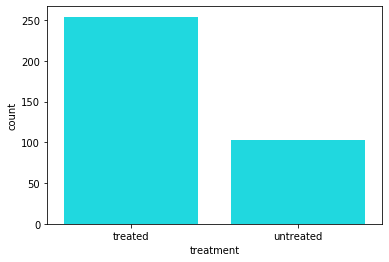

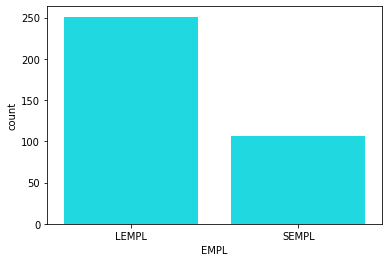

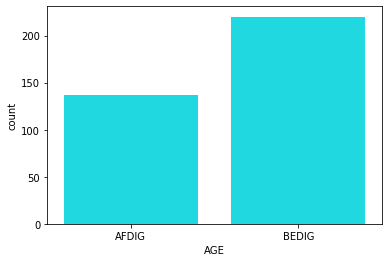

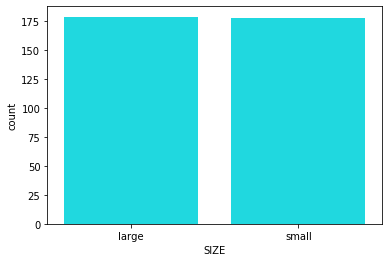

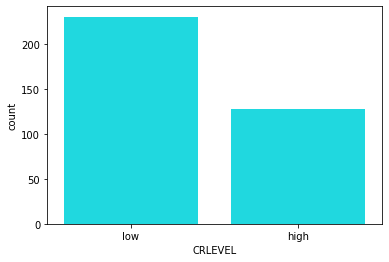

In [13]:
dis_var= ["treatment", "EMPL", "AGE", "SIZE", "CRLEVEL"]
for column in dis_var:
    sns.countplot(df[column], color="#00f6ff")
    plt.show()

How about the continous earnings variable?

In [14]:
key_var = ["INVSALES","INVTSALES","INVINTSALES","INVA","INVTA",
           "INVINTA","INVK", "INVTK", "INVINTK","INV", "INVT",
           "INVINT","LCSALES","SCSALES","LEMPL","LWAGE"]

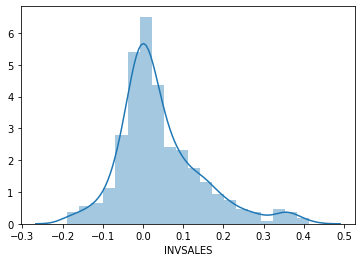

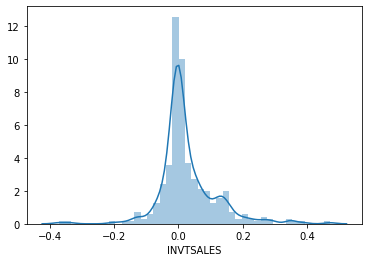

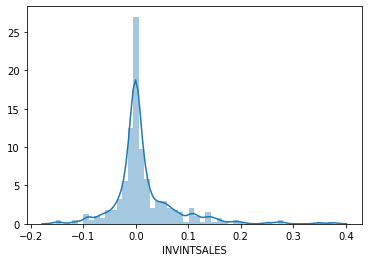

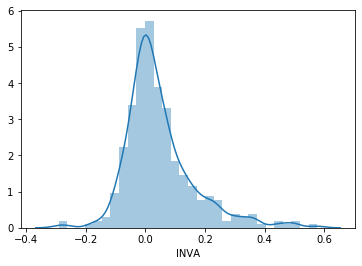

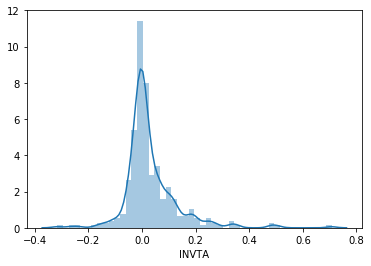

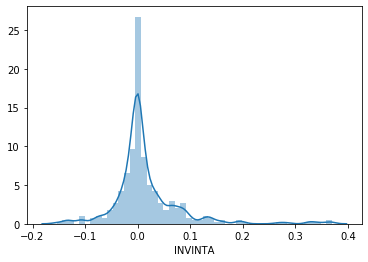

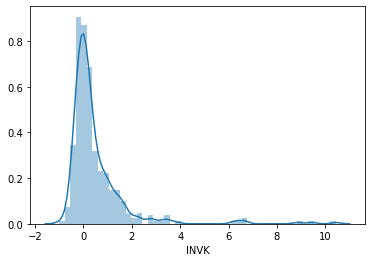

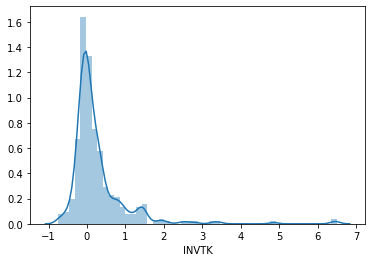

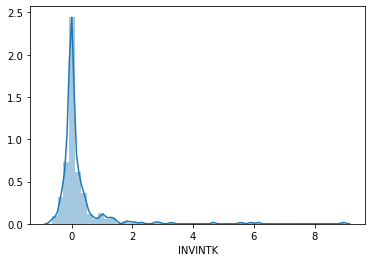

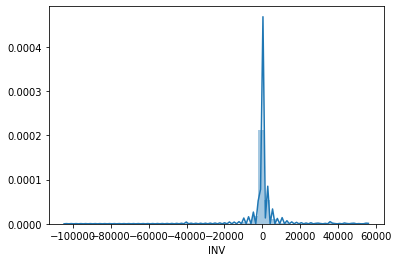

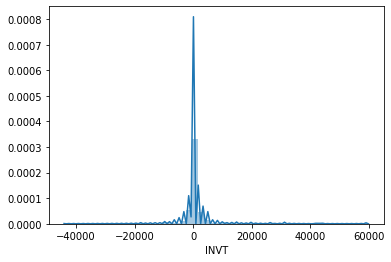

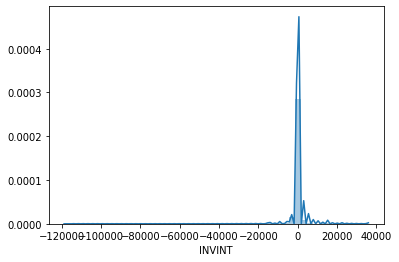

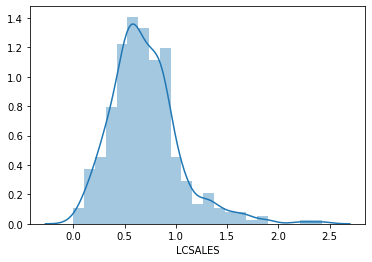

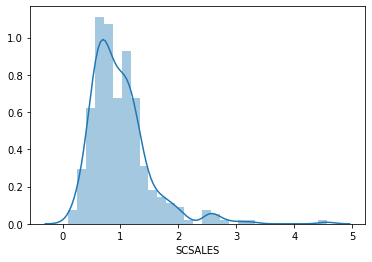

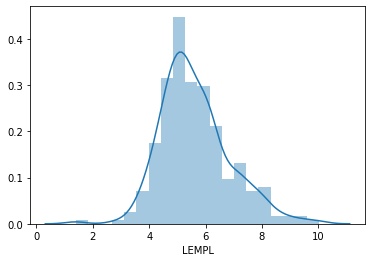

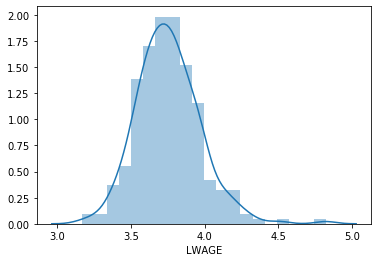

In [15]:

for column in key_var:   
    ax = sns.distplot(df[column]) 
    plt.show()

What is the data that corresponds to $(INVS, INVS_1, INVS_0, T)$?

In [16]:
# We first create True / False
df["T"] = np.nan
df.loc[df["treatment"] == "treated", "T"] = 1
df.loc[~(df["treatment"] == "treated"), "T"] = 0
   

df["INVS"] = df["INVSALES"]
df["INVS_1"] = df.loc[df["treatment"] == "treated", "INVSALES"]
df["INVS_0"] = df.loc[~(df["treatment"] == "treated"), "INVSALES"]


df[["INVS", "INVS_1", "INVS_0", "T"]].tail(5)



,INVS,INVS_1,INVS_0,T
Firm,,,,
352,-0.002,-0.002,NaN,1.0
353,-0.134,-0.134,NaN,1.0
354,-0.062,-0.062,NaN,1.0
355,0.018,NaN,0.018,0.0
356,0.030,0.030,NaN,1.0


Let us get a basic impression on how the distribution of Total **investment/pre_program sales** looks like by treatment status.

In [17]:
df.groupby("T")["INVS"].describe()

,count,mean,std,min,25%,50%,75%,max
T,,,,,,,,
0.0,103.0,0.033330,0.107988,-0.189,-0.0235,0.013,0.086,0.413
1.0,254.0,0.045531,0.102750,-0.186,-0.0150,0.023,0.089,0.384


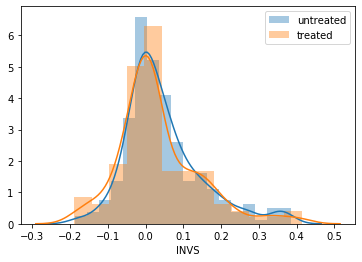

In [18]:
ax = sns.distplot(df.loc[df["treatment"] == "treated", "INVS"], label='untreated')
ax = sns.distplot(df.loc[~(df["treatment"] == "treated"), "INVS"], label='treated')
ax.set_xlim
ax.legend()

We are now ready to reproduce one of the key findings from this article. What is the difference in earnings in 1978 between those that did participate in the program and those that did not?

In [19]:
stat = df.loc[df["treatment"] == "treated", "INVS"].mean() - df.loc[df["treatment"] == "untreated", "INVS"].mean()
f"{stat:.3f}"

'0.012'

In [20]:
df.loc[df["treatment"] == "treated", "INVA"].mean() - df.loc[df["treatment"] == "untreated", "INVA"].mean()

0.019392668756211304

In [21]:
df.loc[df["treatment"] == "treated", "ASSETS"].mean() - df.loc[df["treatment"] == "untreated", "ASSETS"].mean()

33328.95676936014

In [22]:
df.loc[df["treatment"] == "treated", "ASSETS"].mean()

59664.24803149606

In [23]:
df.loc[df["treatment"] == "untreated", "ASSETS"].mean()

26335.29126213592

In [24]:
df.loc[df["treatment"] == "untreated", "SALES"].mean()

21269.165048543688

In [46]:
df.loc[df.treatment == "untreated", "ASSETS"].std()

55773.57199209561

In [34]:
# Table A2 in Appendix
#Pre-Assignment Means (Standard deviation in brackets)
means=[]
for column in ["SALES", "ASSETS", "LCSALES", "SCSALES", "INVSALES", "INVTSALES", "INVINTSALES"]:

    means.append(df.loc[df["treatment"] == "untreated", column].mean().round(3))
means


[21269.165, 26335.291, 0.735, 1.053, 0.033, 0.021, 0.012]

In [35]:
means=[]
for column in ["SALES", "ASSETS", "LCSALES", "SCSALES", "INVSALES", "INVTSALES", "INVINTSALES"]:

    means.append(df.loc[df["treatment"] == "treated", column].mean().round(3))
means

[65963.26, 59664.248, 0.684, 0.962, 0.046, 0.029, 0.016]

In [37]:
df.groupby("T")["ASSETS"].mean()

T
0.0    26335.291262
1.0    59664.248031
Name: ASSETS, dtype: float64

In [38]:
df.groupby("T")["LCSALES"].mean()

T
0.0    0.734583
1.0    0.683709
Name: LCSALES, dtype: float64